In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import optim
from s4hci.utils.data_handling import load_adi_data
from applefy.utils.file_handling import open_fits, save_as_fits
from applefy.utils.fake_planets import add_fake_planets

In [2]:
from s4hci.models.psf_subtraction import S4

In [3]:
torch.set_float32_matmul_precision("high")

# Load the data and insert the fake planet

In [4]:
# 2.) Load the dataset
science_data, raw_angles, raw_psf_template_data = \
    load_adi_data(
        hdf5_dataset="/fast/mbonse/s4/30_data/HD22049_303_199_C-0065_C_.hdf5",
        data_tag="object_stacked_05",
        psf_template_tag="psf_template",
        para_tag="header_object_stacked_05/PARANG")

science_data = science_data[:, 12:-12, 12:-12]
raw_angles = raw_angles[:]

# Background subtraction of the PSF template
psf_template_data = np.median(raw_psf_template_data, axis=0)
psf_template_data = psf_template_data - np.min(psf_template_data)

In [5]:
dataset_id = "0115b"

# add the fake planet
fake_planet_config_file = "/fast/mbonse/s4/70_results/07_partial_contrast_grid/HD22049_303_199_C-0065_C_/configs_cgrid/exp_ID_" + dataset_id + ".json"
with open(fake_planet_config_file) as json_file:
    fake_planet_config = json.load(json_file)

data_with_fake_planet = add_fake_planets(
    input_stack=science_data,
    psf_template=psf_template_data,
    parang=raw_angles,
    dit_psf_template=0.004256,
    dit_science=0.08,
    experiment_config=fake_planet_config,
    scaling_factor=1.0)

In [6]:
# stacking
ss = 1
angles_stacked = np.array([np.mean(i) for i in np.array_split(raw_angles, int(len(raw_angles) / ss))])
science_stacked = np.array([np.mean(i, axis=0) for i in np.array_split(data_with_fake_planet, int(len(raw_angles) / ss))])

# Test lambda validation

In [7]:
s4_model = S4(
    science_cube=science_stacked,
    adi_angles=angles_stacked,
    psf_template=psf_template_data,
    noise_cut_radius_psf=3.6,
    noise_mask_radius=5.4,
    device=0,
    work_dir="/fast/mbonse/s4/70_results/09_new_rotation_loss/xx_test_new_implementation",
    noise_normalization="normal",
    noise_model_lambda_init=1000,
    noise_model_convolve=True,
    rotation_grid_subsample=1,
    verbose=True)

In [8]:
lambdas = np.logspace(1, 8, 200)
all_results, best_lambda = s4_model.validate_lambdas_noise(
    num_separations=10, 
    lambdas=lambdas,
    num_test_positions=10,
    test_size=0.3,
    approx_svd=3000)

S4 model: validating noise model ... S4 Noise: validating noise model ... Compute validation positions for separation 5.2727272727272725 ...
Compute betas for separation 5.2727272727272725 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:13<00:00,  1.38s/it]


Re-mask betas for separation 5.2727272727272725 ...
Compute validation errors for separation 5.2727272727272725 ...
Compute validation positions for separation 10.545454545454545 ...
Compute betas for separation 10.545454545454545 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.23s/it]


Re-mask betas for separation 10.545454545454545 ...
Compute validation errors for separation 10.545454545454545 ...
Compute validation positions for separation 15.818181818181817 ...
Compute betas for separation 15.818181818181817 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.22s/it]


Re-mask betas for separation 15.818181818181817 ...
Compute validation errors for separation 15.818181818181817 ...
Compute validation positions for separation 21.09090909090909 ...
Compute betas for separation 21.09090909090909 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:13<00:00,  1.31s/it]


Re-mask betas for separation 21.09090909090909 ...
Compute validation errors for separation 21.09090909090909 ...
Compute validation positions for separation 26.363636363636363 ...
Compute betas for separation 26.363636363636363 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.26s/it]


Re-mask betas for separation 26.363636363636363 ...
Compute validation errors for separation 26.363636363636363 ...
Compute validation positions for separation 31.636363636363633 ...
Compute betas for separation 31.636363636363633 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.20s/it]


Re-mask betas for separation 31.636363636363633 ...
Compute validation errors for separation 31.636363636363633 ...
Compute validation positions for separation 36.90909090909091 ...
Compute betas for separation 36.90909090909091 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.23s/it]


Re-mask betas for separation 36.90909090909091 ...
Compute validation errors for separation 36.90909090909091 ...
Compute validation positions for separation 42.18181818181818 ...
Compute betas for separation 42.18181818181818 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.25s/it]


Re-mask betas for separation 42.18181818181818 ...
Compute validation errors for separation 42.18181818181818 ...
Compute validation positions for separation 47.45454545454545 ...
Compute betas for separation 47.45454545454545 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.22s/it]


Re-mask betas for separation 47.45454545454545 ...
Compute validation errors for separation 47.45454545454545 ...
Compute validation positions for separation 52.72727272727273 ...
Compute betas for separation 52.72727272727273 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.22s/it]


Re-mask betas for separation 52.72727272727273 ...
Compute validation errors for separation 52.72727272727273 ...
Recommended Lambda = 775259.75
Make sure to check if the tested range of lambda values is covering the global minimum!
[DONE]
[DONE]


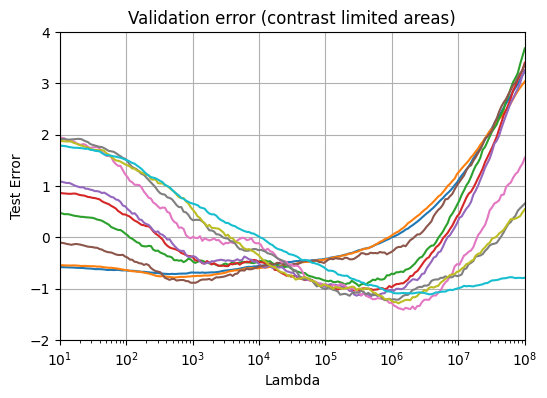

In [9]:
# 4.) Plot the result
merged_results = np.array([i for i in all_results.values()])

fig, (ax1) = plt.subplots(1, 1, figsize=(6, 4))

ax1.plot(lambdas, np.array(merged_results).T)
ax1.set_title("Validation error (contrast limited areas)")
ax1.set_xlabel("Lambda")
ax1.set_ylabel("Test Error")
ax1.set_xscale("log")
ax1.grid()
ax1.set_ylim(-2, 4)
ax1.set_xlim(1e1, 1e8)
plt.show()

In [10]:
best_lambda = lambdas[int(np.median(np.argmin(merged_results, axis=1)))]

In [7]:
best_lambda = 1000

# Test S4 with new rotation loss

In [8]:
s4_model = S4(
    science_cube=science_stacked,
    adi_angles=angles_stacked,
    psf_template=psf_template_data,
    noise_cut_radius_psf=3.6,
    noise_mask_radius=5.4,
    device=0,
    work_dir="/fast/mbonse/s4/70_results/09_new_rotation_loss/xx_test_new_implementation",
    noise_normalization="normal",
    noise_model_lambda_init=best_lambda,
    noise_model_convolve=True,
    rotation_grid_subsample=1,
    verbose=True)

In [9]:
s4_model.fit_noise_model(
    num_epochs=200,
    use_rotation_loss=True,
    training_name="105c_rotation_loss_lambda_1000",
    logging_interval=1,
    optimizer=None,
    optimizer_kwargs=None)

S4 model: Fit noise model ... 

  0%|          | 0/200 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [14]:
s4_model.save_models(
    file_name_noise_model="test_noise_model",
    file_name_normalization_model="test_normalization_model")

S4 model: saving model ... S4 Noise: saving noise model ... [DONE]
[DONE]


# Test old S4 solution with closed form

In [15]:
s4_model = S4(
    science_cube=science_stacked,
    adi_angles=angles_stacked,
    psf_template=psf_template_data,
    noise_cut_radius_psf=3.6,
    noise_mask_radius=5.4,
    device=0,
    work_dir="/fast/mbonse/s4/70_results/09_new_rotation_loss/xx_test_new_implementation",
    noise_normalization="normal",
    noise_model_lambda_init=best_lambda,
    noise_model_convolve=True,
    rotation_grid_subsample=1,
    verbose=True)

In [ ]:
s4_model.fit_noise_model_closed_form(
    num_epochs=100,
    training_name="105c_closed_form",
    logging_interval=1,
    learning_rate=1e-6)

S4 model: Find noise model closed form and fine tune. ... S4 model: finding closed form noise model ... S4 Noise: fitting noise model ... Fitting ... 

  2%|██▍                                                                                                                                                              | 207/13689 [01:46<1:53:16,  1.98it/s]

# Test old S4 with LBFGS

In [10]:
s4_model = S4(
    science_cube=science_stacked,
    adi_angles=angles_stacked,
    psf_template=psf_template_data,
    noise_cut_radius_psf=3.6,
    noise_mask_radius=5.4,
    device=0,
    work_dir="/fast/mbonse/s4/70_results/09_new_rotation_loss/xx_test_new_implementation",
    noise_normalization="normal",
    noise_model_lambda_init=best_lambda,
    noise_model_convolve=True,
    rotation_grid_subsample=1,
    verbose=True)

In [ ]:
s4_model.fit_noise_model(
    num_epochs=200,
    use_rotation_loss=False,
    training_name="105c_rotation_loss_lambda_1000",
    logging_interval=5,
    optimizer=None,
    optimizer_kwargs=None)

S4 model: Fit noise model ... 

  0%|          | 0/200 [00:00<?, ?it/s]

# Test save and restoring the models

In [ ]:
s4_model = S4.create_from_checkpoint(
    noise_model_file="/fast/mbonse/s4/70_results/09_new_rotation_loss/xx_test_new_implementation/models/test_noise_model",
    normalization_model_file="/fast/mbonse/s4/70_results/09_new_rotation_loss/xx_test_new_implementation/models/test_normalization_model",
    s4_work_dir="/fast/mbonse/s4/70_results/09_new_rotation_loss/xx_test_new_implementation",
    science_cube=science_stacked,
    adi_angles=angles_stacked,
    psf_template=psf_template_data,
    device=0,
    verbose=True)

## Test get residual on restored model

In [22]:
residual = s4_model.compute_residual()

In [23]:
plt.imshow(residual)